### CSCI E-82  Homework 3

### Due by 10/22/18 at 11:59pm EST to the Canvas dropbox

## This is an individual homework so there should be no collaboration for this homework.


### Under each problem, we have a place for you to write the answer, or write runnable code that will produce the answer.  Show your work.
-----------


## Your Name: 

### Sharjil Khan

In [106]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random
import statsmodels.api as sm
import itertools

from sklearn import datasets
from sklearn.linear_model import LinearRegression


from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.graphics.api as smg
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, periodogram
from statsmodels.graphics.gofplots import qqplot

import math 
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),            
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

## Problem 1 Climate Change (30 points) 

Scientists and politicians are often at odds on the topic of whether global warming is real and debate the various causes. This problem uses "globalWarm3.csv" data.  This is a real data set.

In [107]:
GlobalWarm_df = pd.read_csv('globalWarm3.csv')
GlobalWarm_df.describe()
#GlobalWarm_df.head()


,Year,Temp,CO2,Solar,Transmission,IceShelf
count,31.000000,31.000000,31.000000,31.000000,30.000000,31.000000
mean,1995.000000,34.419355,361.731935,1365.893548,0.921081,6.556452
std,9.092121,18.014391,14.903299,0.405475,0.019902,0.929274
min,1980.000000,4.000000,338.570000,1365.250000,0.853067,4.300000
25%,1987.500000,21.000000,349.880000,1365.575000,0.924842,6.090000
50%,1995.000000,33.000000,360.020000,1365.860000,0.929517,6.560000
75%,2002.500000,51.500000,373.230000,1366.255000,0.930138,7.350000
max,2010.000000,63.000000,388.130000,1366.510000,0.932367,7.880000


In [108]:
# We see that Transmission has a missing data. So we drop that row from the data set.
GlobalWarm_df.dropna(inplace=True,axis=0)
GlobalWarm_df.describe()

,Year,Temp,CO2,Solar,Transmission,IceShelf
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1994.966667,34.600000,361.724667,1365.906667,0.921081,6.512333
std,9.245626,18.293771,15.158018,0.405661,0.019902,0.911542
min,1980.000000,4.000000,338.570000,1365.250000,0.853067,4.300000
25%,1987.250000,20.000000,349.300000,1365.582500,0.924842,6.070000
50%,1994.500000,34.000000,359.080000,1365.890000,0.929517,6.555000
75%,2002.750000,53.250000,373.840000,1366.292500,0.930138,7.232500
max,2010.000000,63.000000,388.130000,1366.510000,0.932367,7.850000


### Problem 1a 
Plot a scatter plot of the following variables in a lattice: Temp, CO2, Solar, Transmission, and IceShelf. 
    
The variables represent the following:
- Temp = annual surface temperature measured in $1/100^{\circ} C$ over the 1950-1980 mean.
- Solar = annual mean intensity of sunlight piercing the atmosphere 
- CO2 = annual average fraction CO2 in atmosphere (#molecules/#molecules of dry air) 
- IceShelf = sea ice in 1MM square miles hypothesized to reflect heat 
- Transmission = volcanic MLO transmission data where eruptions release greenhouse gases but also decrease the temperature 




['Temp', 'CO2', 'Solar', 'Transmission', 'IceShelf']


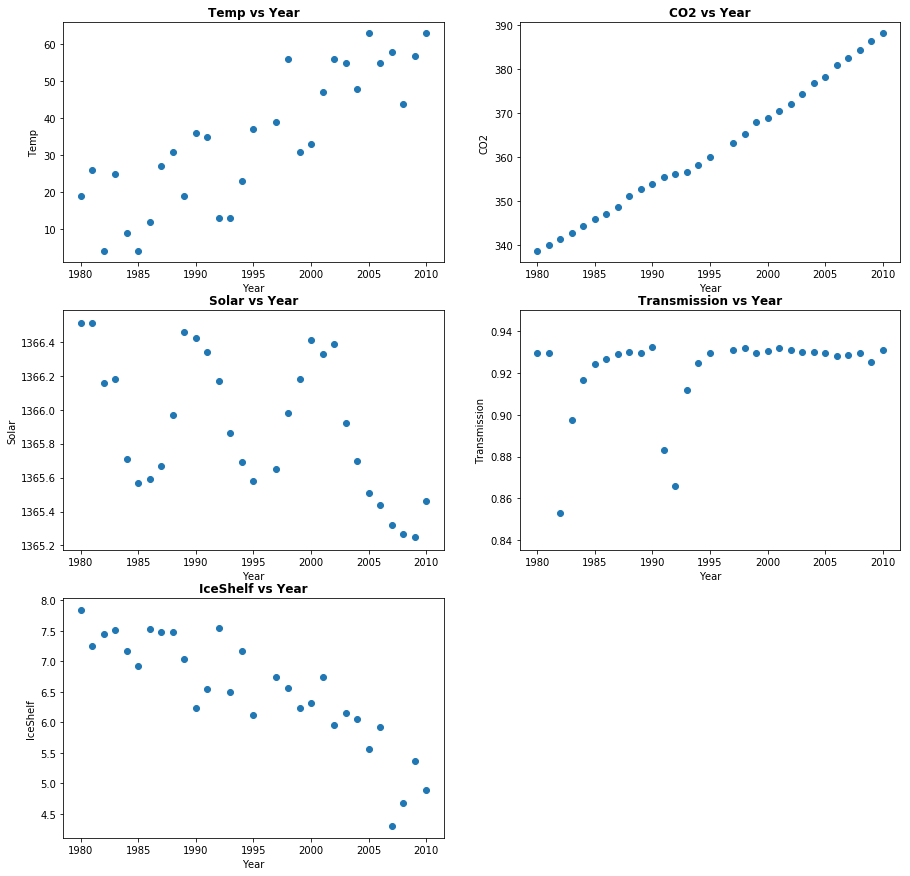

In [110]:
vars =list(GlobalWarm_df.columns)
vars.remove('Year')
print(vars)

plt.subplots(2,2,figsize=(15,15))

i = 1
for var in vars:
    plt.subplot(3,2,i)
    plt.title(var + " vs Year", fontweight='bold')
    plt.scatter(GlobalWarm_df['Year'], GlobalWarm_df[var])
    plt.xlabel("Year")
    plt.ylabel(var)
    i=i+1
    
plt.tight_layout
plt.show()


### Problem 1b 
Compute a multiple linear regression model of log(Temp) against the other variables. Note that since there are limited number of annual measurements, you cannot run all combinations of variables. In fact, you can only do complete pairwise interactions. Be sure to remove the non-significant variables while still maintaining the hierarchy principle in your final model. You do not need to show full diagnostics for the different models that you try, but do show the equations that you tried.

In [111]:
df_GlobalWarm_log = GlobalWarm_df.copy()
df_GlobalWarm_log['Temp'] = np.log(df_GlobalWarm_log['Temp']) 

#f = 'Temp ~ Year + CO2 +  Solar + Transmission + IceShelf + \
#     Year*CO2 + Year*Solar + Year*Transmission + Year*IceShelf + \
#     CO2*Solar + CO2*Transmission + CO2*IceShelf + \
#     Solar*Transmission + Solar*IceShelf + \
#     Transmission* IceShelf'

#f = 'Temp ~ CO2 +  Solar + Transmission + IceShelf' 
#f = 'Temp ~ CO2 + IceShelf' 
#f = 'Temp ~ CO2 +  Solar + Transmission' 

#f = 'Temp ~ CO2 +  Solar + Transmission + IceShelf + \
#     CO2*Solar + CO2*Transmission + CO2*IceShelf + \
#     Solar*Transmission + Solar*IceShelf + \
#     Transmission* IceShelf'

#FINAL EQUATION
f = 'Temp ~ CO2 + Solar + Transmission + Solar*Transmission ' 

model = sm.OLS.from_formula(formula=f , data = df_GlobalWarm_log)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     26.23
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.26e-08
Time:                        17:38:08   Log-Likelihood:                -8.8358
No. Observations:                  30   AIC:                             27.67
Df Residuals:                      25   BIC:                             34.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -1.44e+05   4.09

### Final Regression Equation to find Log Temp
LogTemp = -144000 + (0.0324 X CO2) + (105.42 X Solar) + (154600 X Transmission) -(113.3 X (Solar * Transmission))

### Problem 1c
Run the diagnostics to determine whether your final model is appropriate.

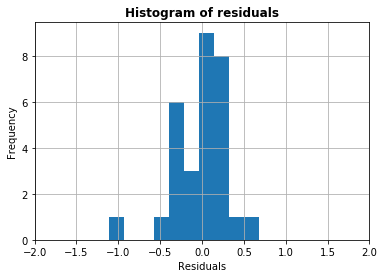

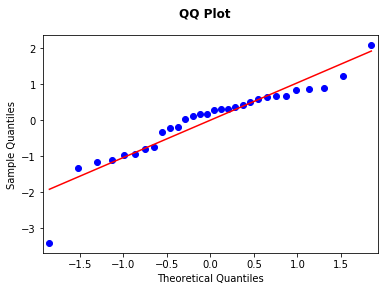

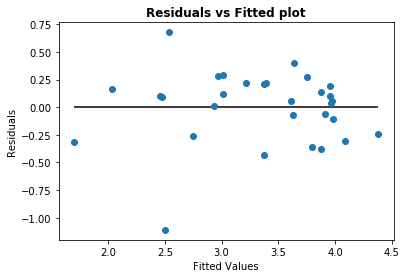

In [112]:
plt.title("Histogram of residuals", fontweight='bold')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-2,2)
plt.grid(True)
plt.hist(results.resid)
plt.show()

fig = sm.qqplot(results.resid, fit=True, line='r')
fig.suptitle("QQ Plot", fontweight='bold')
plt.show()

plt.title("Residuals vs Fitted plot", fontweight='bold')
plt.plot(results.fittedvalues,  results.resid,'o')
plt.hlines(xmin=np.min(results.fittedvalues),xmax=np.max(results.fittedvalues),y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


### Problem 1d 

Describe in what way the model diagnostics are appropriate or not.  Be specific.

There are several factors that we can glean from the model diagnostics above.

1. From the Stats Model Summary:  
   The r-squared value is 0.80 which is better than most of the other formulas that were tried out.  
   The highest p-values for all the variables and interaction terms that were kept is 0.002 which is a lot lower than 0.05. This means all the predictors used in the final model is statistically significant.  
   AIC and BIC values of 27.67 & 64.68 are also lower than the other formulas that were tried out.  
   Durbin-Watson statistic of 2.237 if close to 2 which means there is very little auto correlation between the variables.
   
2. From the Histogram of residuals we can conclude that the residuals are very close to normaly distributed around the mean which means there is not pattern in the residuals.  
3. From the QQ Plot we dont see the core part as close to the theoretical values from the normal distribution as we would have liked, but given we have very few data points to go by, it is fairly close to the line.  
4. The residuals VS Fitted plot also shows the residuals are pretty evenly distributed around 0 with only one point significantly outside the range of the others.  



### Problem 1e

Using your knowledge of statistics, what would you conclude about climate change?

Looking at the data it is very clear that temperatures and CO2 levels are increasing over the years and ice shelfs are decreasing.  

There is conclusive evidence that our climate is changing over time.

## Problem 2  Matrix model for regression (8 points)

### Problem 2a  
Using the features that you deemed important in Problem 1, construct the matrix forms of the appropriate variables.  Specifically you will need a matrix X that has the features used in your solution and a Y = logTemp.  Print the head of each of these.

In [114]:
Y = np.log(GlobalWarm_df['Temp'])
Y.shape
X = GlobalWarm_df.drop(['Temp','Year', 'IceShelf'], axis =1)
X = X.assign(const = 1)
X['SolarXTransmission'] = X['Solar'] * X['Transmission']
print("Y:")
print(Y.head())
print("\nX Matrix:")
print(X.head())


Y:
0    2.944439
1    3.258097
2    1.386294
3    3.218876
4    2.197225
Name: Temp, dtype: float64

X Matrix:
      CO2    Solar  Transmission  const  SolarXTransmission
0  338.57  1366.51      0.929667      1         1270.398797
1  339.92  1366.51      0.929767      1         1270.535448
2  341.30  1366.16      0.853067      1         1165.425558
3  342.71  1366.18      0.897717      1         1226.442556
4  344.24  1365.71      0.916492      1         1251.661835


### Problem 2b  
Use the matrix calculation for the pseudo-inverse provided in lecture.  

In [115]:
Betas = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T),Y)
print(Betas)

[ 3.23583995e-02  1.05410463e+02  1.54552921e+05 -1.44030628e+05
 -1.13117667e+02]


## Problem 2c
How does the answer in Problem 2b compare to that of 1b?

According to 2b the co-efficients are : 
  
Intercept -1.44058151e+05  
CO2 3.23557175e-02  
Solar 1.05430610e+02  
Transmission 1.54582621e+05  
Solar X Transmission -1.13139406e+02  

The above co-efficients are the same as the ones found by the OLS model in 1b
Intercept           -1.44e+05     
CO2                    0.0324    
Solar                105.4178      
Transmission        1.546e+05    
Solar:Transmission  -113.1256       


## Problem 3 Time Series Modeling (40 points)

Use the data timeSeries4.csv for this problem. The data are monthly reports of production.

### Problem 3a
Plot the data and perform an exploratory analysis on the raw time series file. Comment on any trends, outliers, seasonality, whether it's stationary, etc.

            index        data    data_log  data_log_diff
count  147.000000  147.000000  147.000000     147.000000
mean    74.000000   24.548371    3.194111       0.000475
std     42.579338    2.647094    0.119485       0.038921
min      1.000000   10.521345    2.353406      -0.268130
25%     37.500000   22.818344    3.127565      -0.016692
50%     74.000000   24.553665    3.200861      -0.003237
75%    110.500000   26.714155    3.285193       0.016254
max    147.000000   29.688140    3.390748       0.264494
   index       data  data_log  data_log_diff
1      1  21.622112  3.073717      -0.000941
2      2  19.583297  2.974677      -0.032752
3      3  23.290602  3.148050       0.056648
4      4  21.729621  3.078676      -0.022283
5      5  21.098816  3.049217      -0.009615


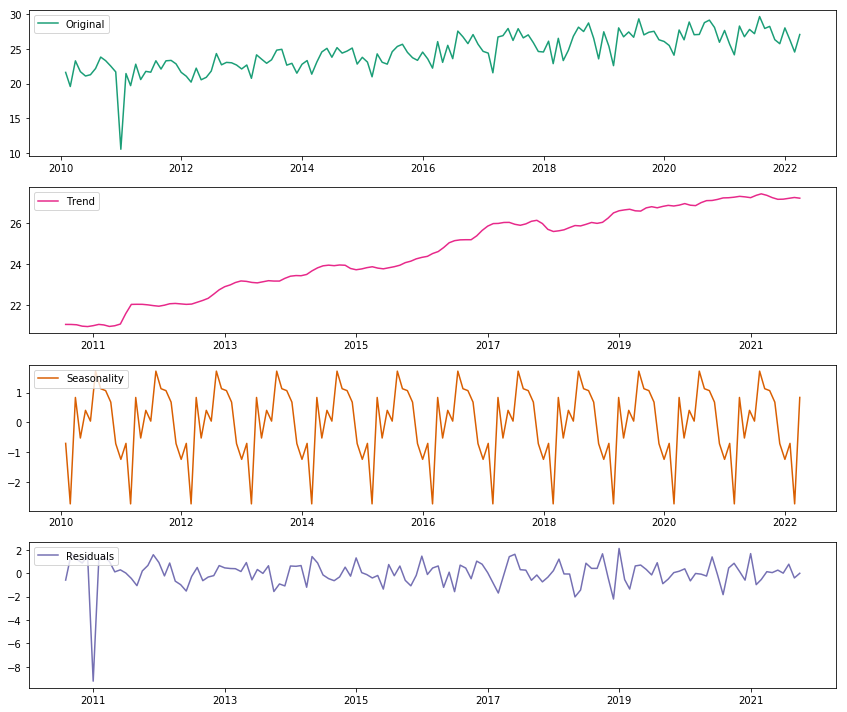

In [23]:
df_TimeSeries4 = pd.read_csv('timeSeries4.csv',  header=None, names = ["index", "data"])
df_TimeSeries4['data_log'] = np.log(df_TimeSeries4['data'])
df_TimeSeries4['data_log_diff'] = np.log(df_TimeSeries4['data_log']).diff()
df_TimeSeries4.dropna(inplace=True)

print(df_TimeSeries4.describe())
print(df_TimeSeries4.head())


def breakout_plots(seas_series):
    decomposition = seasonal_decompose(seas_series) 

    f, ax = plt.subplots(1,4,figsize=(12, 10))

    plt.subplot(411)
    plt.plot(seas_series, label='Original', c=dark2_colors[0])
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', c=dark2_colors[1])
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal,label='Seasonality', c=dark2_colors[2])
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', c=dark2_colors[3])
    plt.legend(loc='upper left')
    plt.tight_layout()
    return decomposition

df_TimeSeries4.index = pd.date_range('2010-01-01', freq = 'M', periods = len(df_TimeSeries4))
decomposition = breakout_plots(df_TimeSeries4['data'])


Looking at the Plots above, we can clearly see that there is an upward trend in the data.   
There is also a seasonal pattern between every 12 data points pointing to a yearly seasonality cycle.  
The mean is certainly not time invariant because of the clear rising trend. The data is not stationary.  
There seems to be one outlier around the 12th data point but most of the other data points.


### COMMENT ON THE ABOVE CHART!!

### Problem 3b
Using your knowledge of ACF, PACF and other diagnostics, walk us through the selection of an appropriate time series model for the data.  We are interested in both the result and your logical journey to reach that model.  That journey should begin with observations from the ACF and PACF pattern.

C:\Users\shkhan2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


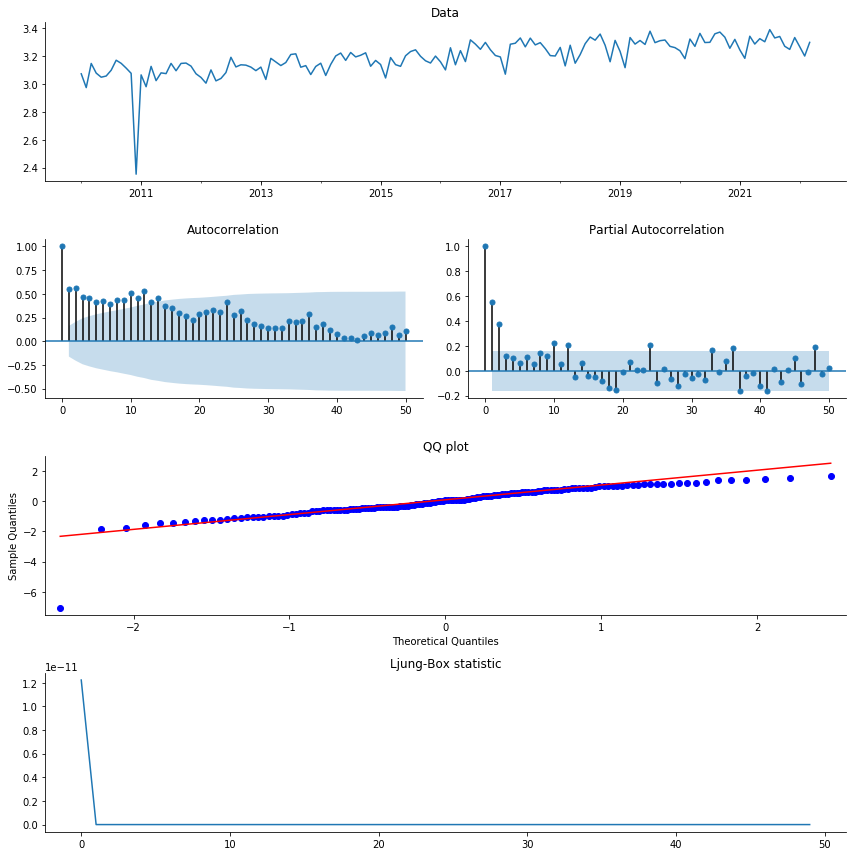

In [103]:
#seaborn.set(style='ticks', context='talk')

def tsplot(y, lags=None, figsize=(12, 12), orig = False):
    
    q, p = sm.stats.diagnostic.acorr_ljungbox(y,lags)
    fig = plt.figure(figsize=figsize)
    layout = (4, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0), colspan=2, title='QQ plot')
    lbox_ax = plt.subplot2grid(layout, (3, 0), colspan=2, title='Ljung-Box statistic')
    if orig: 
        y.plot(ax=ts_ax, title='Data')
    else : 
        y.plot(ax=ts_ax, title='Residuals')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    
    qqplot(y,  line='q', ax=qq_ax, fit=True)
    if np.max(p) > 0.05:
        lbox_ax.axhline(y=0.05, xmin=0, xmax=lags, c ='r')
    lbox_ax.plot(p)
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax, lbox_ax

_ = tsplot(df_TimeSeries4['data_log'], 50, orig = True)

THE ACF is decaying over time to 0 which would mean a MA(1) model would be appropriate.  
On the PACF plot we can see it drops down beyond a lag of 1 with spikes about every 12 periods. This tells us in AR(1) model on the seasonal component would be good to model this element.  
So as a starting point we would start with a order(1,1,1) and seasonal_order = (1,1,0,12) 
  
But after experimentation in the next section it was determined that the AR coefficsient was not significant so I dropped it and was left with the final model order(0,1,1) and seasonal_order = (1,1,0,12)  which had the best AIC and BIC scores as well.

### Problem 3c
Apply and show the appropriate diagnostics to the model to assert that it is valid.  Include not just a plot but your interpretation of the plot in your justification.

                                 Statespace Model Results                                 
Dep. Variable:                    D.DS12.data_log   No. Observations:                  134
Model:             SARIMAX(0, 0, 1)x(1, 0, 0, 12)   Log Likelihood                 151.899
Date:                            Thu, 25 Oct 2018   AIC                           -297.798
Time:                                    17:27:09   BIC                           -289.105
Sample:                                02-28-2011   HQIC                          -294.266
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9793      0.078    -12.523      0.000      -1.133      -0.826
ar.S.L12      -0.4276      0.023   

C:\Users\shkhan2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


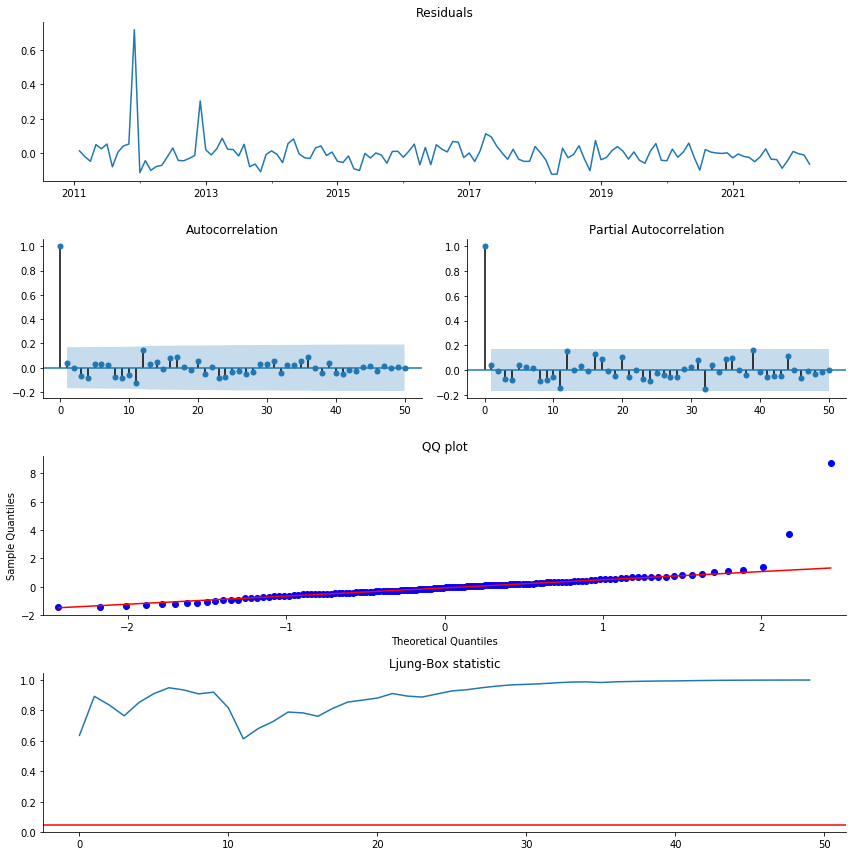

In [105]:

#mod = sm.tsa.statespace.SARIMAX(df_TimeSeries4[1], trend='c', freq='M', order=(3,0,3), simple_differencing=True)
#mod = smt.SARIMAX(df_TimeSeries4['data_log'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), simple_differencing=True) 
#mod = smt.SARIMAX(df_TimeSeries4['data_log'], order=(0, 1, 1), seasonal_order=(1, 1, 0, 12), simple_differencing=True) # 258 250
mod = smt.SARIMAX(df_TimeSeries4['data_log'], order=(0, 1, 1), seasonal_order=(1, 1, 0, 12), simple_differencing=True) # 297 289
results_ARIMA = mod.fit()
print (results_ARIMA.summary())

_ = tsplot(results_ARIMA.resid, 50)


After experimenting with several models, the final model that I think fits best is order=(0, 1, 1), seasonal_order=(1, 1, 0, 12):  
AIC & BIC scores of -297 and -289 were the best scores achieved among multiple tries with slightly different models.  
We can also see that all the coefficients are statistically significant with probablities of the null hypothesis being true of 0.  
ACF and PACF of the residuals are also within 0.2 and -0.2 for all values except 0.  
The QQ Plot is also showing all points are on the line between -1 and 1 meaning the residuals are fairly normally distributed.  
The Ljung-Box Plots also stays high for all lags with a slight dip at 12.  



## Problem 4 (15 points)

For a time series data set, a (2,1,1) was derived with the following coefficients:

const   -0.3916      
ar1      0.9172      
ar2     -0.2390      
ma1      0.4012      

The last 5 points are -104.6, -102.1, -103.2, -109.8, -115.7

Compute the next 3 data points by writing the calculation in python.  Note that this will require not only plugging values into the equation, but also taking the d term of the (p,d,q) ARIMA model into account.  We do not need a general form or function--just the required calculations.

In [53]:
# Number of terms to predict into the future
n=3
start = 5

# MODEL PARAMETERS
const = -0.3916
ar1 = 0.9172
ar2 = -0.2390
ma1 = 0.4012

terms = [-104.6, -102.1, -103.2, -109.8, -115.7]

# CALCULATE THE NEXT n TERMS
for i in range(n):
    t = len(terms)
    next_term = const + terms[t-1] + (ar1*(terms[t-1]-terms[t-2])) + (ar2*(terms[t-2]-terms[t-3]))
    terms.append(next_term)

# PRINT THE NEXT n TERMS
print("THE NEXT %d TERMS ARE : "%n)
for i in range(n):
    print(terms[start])
    start = start+1

THE NEXT 3 TERMS ARE : 
-119.92568000000001
-122.78297369600003
-124.78534595397123


## Problem 5 (2 points)
How many hours did this homework take you?  The answer to this question will not affect your grade.

12 hours

## Last step (5 points)

Save this notebook as LastnameFirstnameHW3.ipynb such as BradyTom.ipynb. Create a pdf of this notebook named similarly. Submit both the python notebook and the pdf version to the Canvas dropbox. We require both versions.